<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_python/LSTM%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow Dataset을 이용한 파이프라인 구축

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [6]:
#!pip install finance-datareader

import FinanceDataReader as fdr

In [7]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

In [8]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-29,82400,82500,81500,81700,20000973,-0.004872
2021-04-30,81900,82100,81500,81500,18673197,-0.002448
2021-05-03,81000,82400,81000,81700,15710336,0.002454
2021-05-04,81900,82600,81800,82600,12532550,0.011016
2021-05-06,81700,82300,81700,82100,6156800,-0.006053


In [9]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

In [10]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-04-29,133.48,136.72,136.99,132.49,151100000.0,-0.0007
2021-04-30,131.46,131.77,133.55,131.12,109840000.0,-0.0151
2021-05-03,132.54,132.07,134.06,131.84,75140000.0,0.0082
2021-05-04,127.85,128.60,128.60,126.74,136570000.0,-0.0354
2021-05-05,128.10,129.22,130.43,127.98,84000000.0,0.0020


In [11]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL', '2017')

In [12]:
apple.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


In [13]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')

In [14]:
ford.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-03-18,1.85,1.85,1.88,1.84,3770000.0,-0.0160
1980-03-19,1.87,1.87,1.88,1.85,1560000.0,0.0108
1980-03-20,1.88,1.88,1.90,1.87,1450000.0,0.0053
1980-03-21,1.80,1.80,1.87,1.78,5020000.0,-0.0426
1980-03-24,1.73,1.73,1.77,1.68,3330000.0,-0.0389


In [15]:
ford.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-12-23,9.44,9.50,9.57,9.40,54800000.0,-0.0042
2019-12-24,9.47,9.44,9.49,9.43,11880000.0,0.0032
2019-12-26,9.45,9.47,9.49,9.43,28980000.0,-0.0021
2019-12-27,9.36,9.45,9.46,9.35,28270000.0,-0.0095
2019-12-30,9.25,9.34,9.35,9.23,36090000.0,-0.0118


In [16]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [17]:
stock = fdr.DataReader(STOCK_CODE)

In [18]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-05-09,1058,1067,1049,1065,80550,NaN
1997-05-10,1067,1083,1063,1065,45330,0.000000
1997-05-12,1077,1095,1068,1085,106040,0.018779
1997-05-13,1086,1099,1070,1099,75720,0.012903
1997-05-15,1102,1141,1100,1131,188280,0.029117


In [19]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-29,82400,82500,81500,81700,20000973,-0.004872
2021-04-30,81900,82100,81500,81500,18673197,-0.002448
2021-05-03,81000,82400,81000,81700,15710336,0.002454
2021-05-04,81900,82600,81800,82600,12532550,0.011016
2021-05-06,81700,82300,81700,82100,6156800,-0.006053


In [20]:
stock.index

DatetimeIndex(['1997-05-09', '1997-05-10', '1997-05-12', '1997-05-13',
               '1997-05-15', '1997-05-16', '1997-05-17', '1997-05-19',
               '1997-05-20', '1997-05-21',
               ...
               '2021-04-22', '2021-04-23', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-06'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [21]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [22]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-05-09,1058,1067,1049,1065,80550,NaN,1997,5,9
1997-05-10,1067,1083,1063,1065,45330,0.000000,1997,5,10
1997-05-12,1077,1095,1068,1085,106040,0.018779,1997,5,12
1997-05-13,1086,1099,1070,1099,75720,0.012903,1997,5,13
1997-05-15,1102,1141,1100,1131,188280,0.029117,1997,5,15


Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


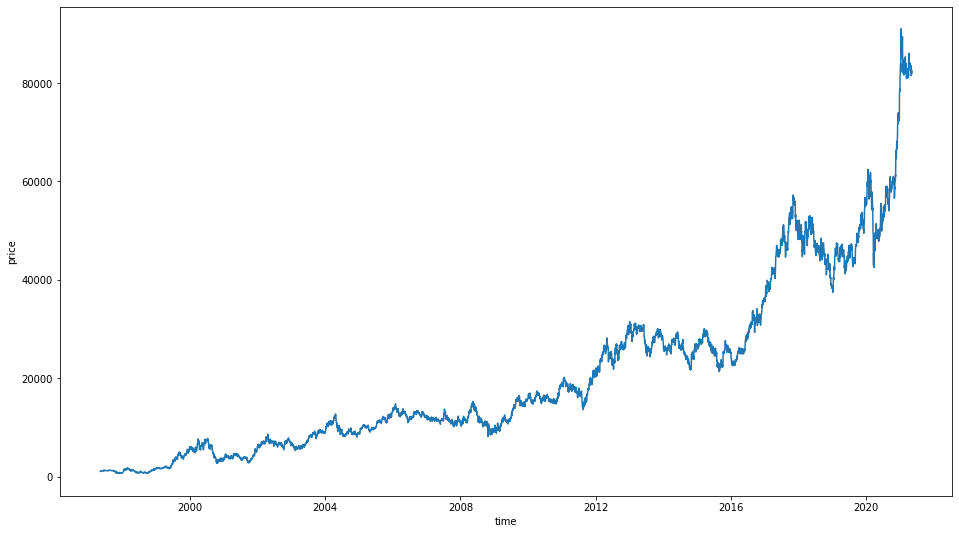

In [23]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


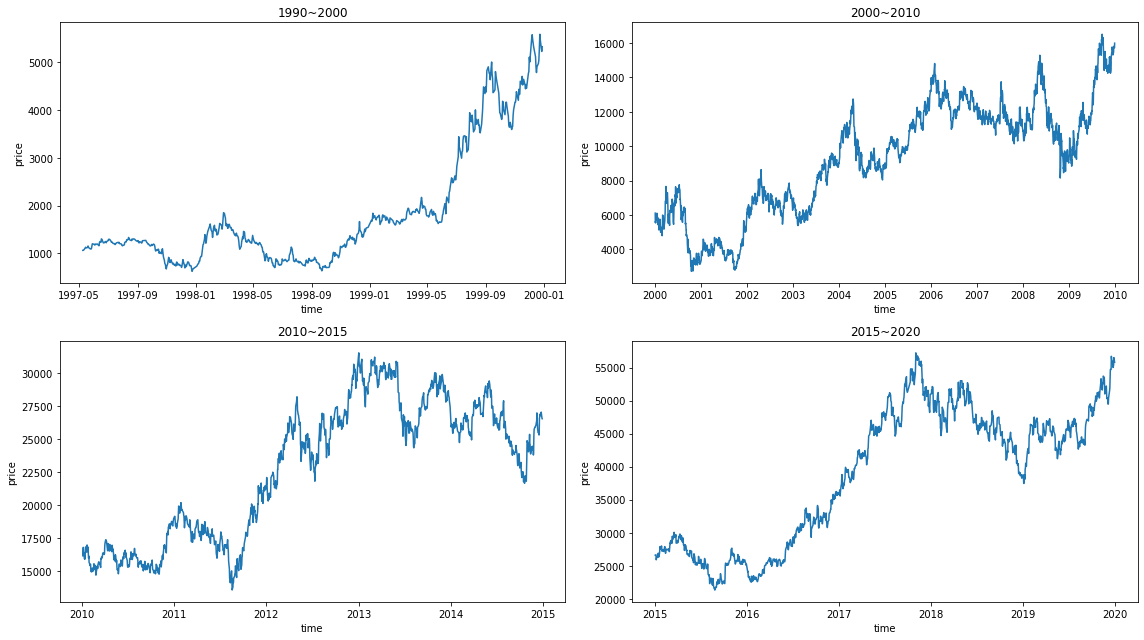

In [24]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

데이터 전처리

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[1.17165006e-02, 1.10227273e-02, 1.17206704e-02, 4.84658028e-03,
        8.91965563e-04],
       [1.18161683e-02, 1.11880165e-02, 1.18770950e-02, 4.84658028e-03,
        5.01959019e-04],
       [1.19269103e-02, 1.13119835e-02, 1.19329609e-02, 5.06788532e-03,
        1.17422754e-03],
       ...,
       [8.97009967e-01, 8.51239669e-01, 9.05027933e-01, 8.97093158e-01,
        1.73967457e-01],
       [9.06976744e-01, 8.53305785e-01, 9.13966480e-01, 9.07051885e-01,
        1.38778436e-01],
       [9.04761905e-01, 8.50206612e-01, 9.12849162e-01, 9.01519259e-01,
        6.81769532e-02]])

In [26]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

x_train.shape, y_train.shape

x_test.shape, y_test.shape

((1200, 4), (1200,))

In [28]:
x_train

,Open,High,Low,Volume
0,0.011717,0.011023,0.011721,0.000892
1,0.011816,0.011188,0.011877,0.000502
2,0.011927,0.011312,0.011933,0.001174
3,0.012027,0.011353,0.011955,0.000838
4,0.012204,0.011787,0.012291,0.002085
...,...,...,...,...
4795,0.309192,0.288430,0.304358,0.003377
4796,0.303654,0.286364,0.305922,0.002718
4797,0.306744,0.292562,0.309050,0.003396
4798,0.312946,0.292769,0.311732,0.003238


In [29]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [30]:
#Hyperparameter를 정의합니다.
WINDOW_SIZE=20
BATCH_SIZE=32

In [31]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [32]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [34]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [35]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [36]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 5s 19ms/step - loss: 9.4000e-05 - mse: 1.8800e-04 - val_loss: 9.8410e-04 - val_mse: 0.0020

Epoch 00001: val_loss improved from inf to 0.00098, saving model to tmp/ckeckpointer.ckpt
Epoch 2/50
150/150 [==============================] - 2s 12ms/step - loss: 1.1721e-05 - mse: 2.3441e-05 - val_loss: 0.0013 - val_mse: 0.0027

Epoch 00002: val_loss did not improve from 0.00098
Epoch 3/50
150/150 [==============================] - 2s 13ms/step - loss: 1.0950e-05 - mse: 2.1899e-05 - val_loss: 0.0012 - val_mse: 0.0025

Epoch 00003: val_loss did not improve from 0.00098
Epoch 4/50
150/150 [==============================] - 2s 13ms/step - loss: 1.5000e-05 - mse: 3.0000e-05 - val_loss: 7.4570e-04 - val_mse: 0.0015

Epoch 00004: val_loss improved from 0.00098 to 0.00075, saving model to tmp/ckeckpointer.ckpt
Epoch 5/50
150/150 [==============================] - 2s 13ms/step - loss: 1.1116e-05 - mse: 2.2232e-05 - val_loss: 9.9412e-04 - val_mse: 

In [37]:
#저장한 ModelCheckpoint 를 로드합니다.
model.load_weights(filename)

In [38]:
pred = model.predict(test_data)

pred.shape

(1180, 1)

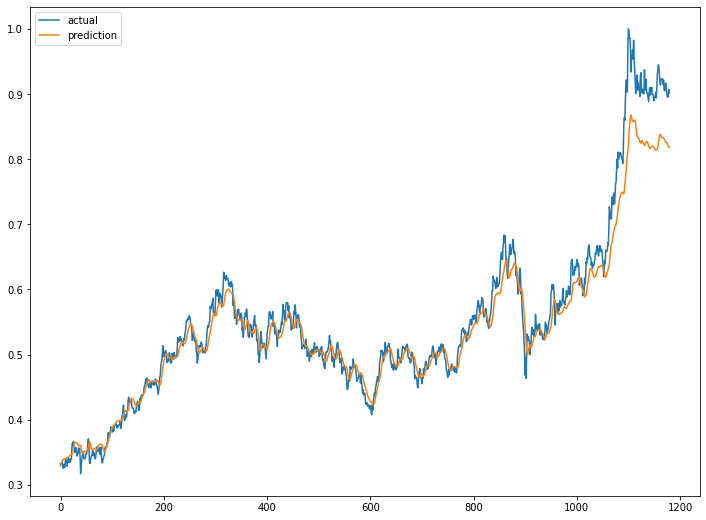

In [39]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()